<a href="https://colab.research.google.com/github/rizwana139/ElevateLabs-Excel-Report-Generator-Project/blob/main/excel_report_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Expenses1.csv to Expenses1 (2).csv


In [ ]:
#Load CSV
import pandas as pd
file_path = "Expenses.csv"
df = pd.read_csv(file_path)
print(df.head())

         Date   Category  Amount         Description
0  03-01-2025       Food   10000    Grocery shopping
1  05-01-2025       Rent   12500  Monthly house rent
2  10-01-2025  Transport    1800            Bus pass
3  12-01-2025  Utilities    1800        Current Bill
4  15-01-2025   Recharge    1299     Mobile recharge


In [ ]:
df['Category'] = df['Category'].str.strip().str.title()

In [ ]:
#Create Pivot Table
#Create Pivot Table
pivot = df.pivot_table(index="Category",values="Amount",aggfunc="sum").reset_index()
print(pivot)

        Category  Amount
0  Entertainment   13600
1           Food   55040
2     Healthcare   20399
3         Others   27400
4       Recharge   13093
5           Rent   87500
6       Shopping   30500
7           Tour   26200
8      Transport   11210
9      Utilities   14790


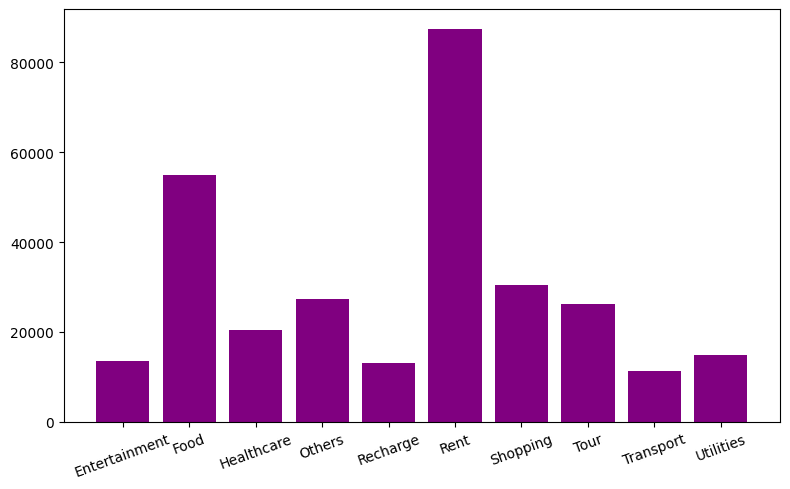

In [ ]:
#Create and Save Chart
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar(pivot["Category"], pivot["Amount"], color='purple')
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("bar_chart.png")
plt.show()
plt.close()

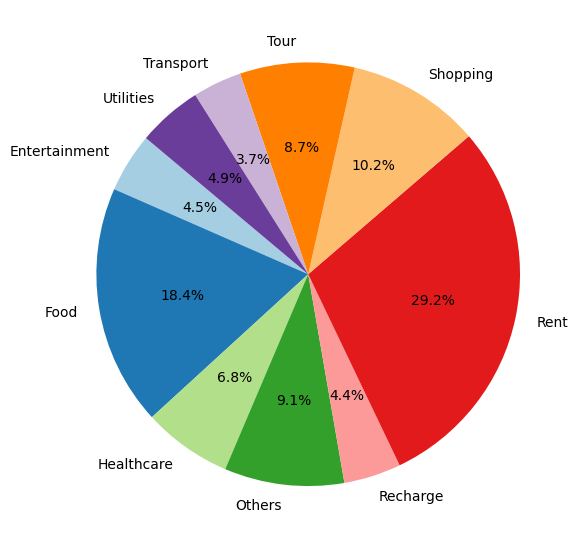

In [ ]:
#Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(pivot["Amount"], labels=pivot["Category"], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.tight_layout()
plt.savefig("pie_chart.png")
plt.show()

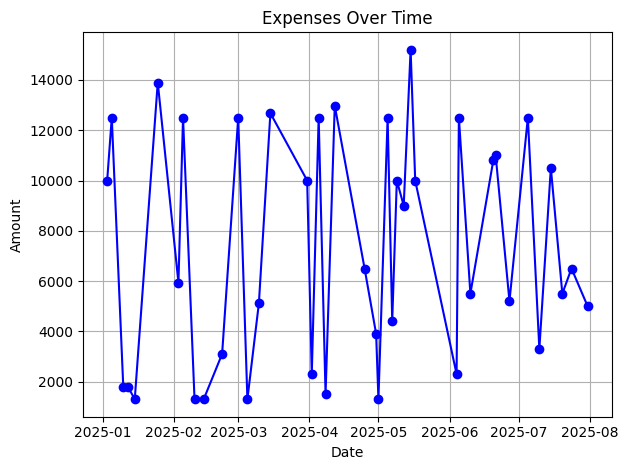

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')
plt.plot(df['Date'], df['Amount'], marker='o', color='blue')
plt.title('Expenses Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=360)
plt.grid(True)
plt.tight_layout()
plt.savefig("line_chart.png")
plt.show()

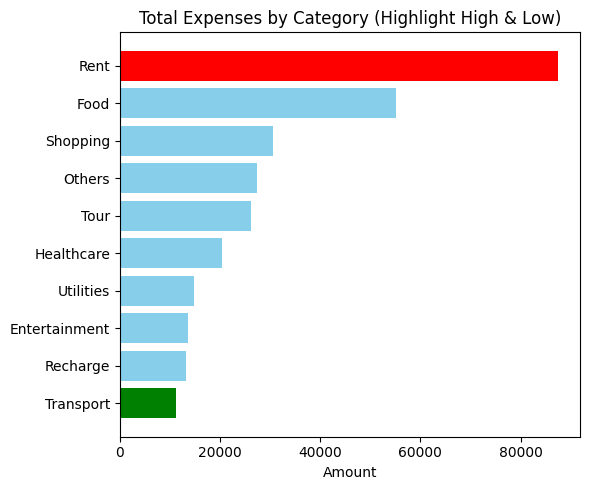

In [ ]:
# Group totals by category
totals = df.groupby("Category")["Amount"].sum().sort_values()

# Identify high & low
highest = totals.idxmax()
lowest = totals.idxmin()

# Set colors: default = skyblue, high = red, low = green
colors = ['skyblue'] * len(totals)
colors[list(totals.index).index(highest)] = 'red'
colors[list(totals.index).index(lowest)] = 'green'

# Plot horizontal bar chart
plt.figure(figsize=(6, 5))
plt.barh(totals.index, totals.values, color=colors)
plt.title("Total Expenses by Category (Highlight High & Low)")
plt.xlabel("Amount")
plt.tight_layout()
plt.savefig("horizontal_bar.png")
plt.show()

In [ ]:
!pip install openpyxl

In [ ]:
# Create Excel Workbook
from openpyxl import Workbook
from openpyxl.drawing.image import Image
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import Font
import pandas as pd

wb = Workbook()
ws = wb.active
ws.title = "Report"

# Add Report Title
ws.merge_cells("A1:B1")
ws["A1"] = "Excel Summary Report"
ws["A1"].font = Font(bold=True, size=14)

# Add Pivot Data
for row in dataframe_to_rows(pivot, index=False, header=True):
    ws.append(row)

# Add Summary Stats
ws.append([])  # blank row
ws.append(["Total Amount",         f"₹{df['Amount'].sum():,.2f}"])
ws.append(["Average Amount",       f"₹{df['Amount'].mean():,.2f}"])
ws.append(["Minimum Amount",       f"₹{df['Amount'].min():,.2f}"])
ws.append(["Maximum Amount",       f"₹{df['Amount'].max():,.2f}"])
ws.append(["Standard Deviation",   f"₹{df['Amount'].std():,.2f}"])

# Add Charts as Images
bar_img = Image("bar_chart.png")
ws.add_image(bar_img, "D3")

pie_img = Image("pie_chart.png")
ws.add_image(pie_img, "Q2")

line_img = Image("line_chart.png")
ws.add_image(line_img, "D37")

horizontal_bar_img = Image("horizontal_bar.png")
ws.add_image(horizontal_bar_img, "Q37")
#save and download excel file
excel_file = "Excel_output_report.xlsx"
wb.save(excel_file)
files.download(excel_file)
print("Excel file saved Successfully")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Excel file saved Successfully
